In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn
import math
import seaborn as sns
from io import StringIO
import time
from sklearn.model_selection import train_test_split, GridSearchCV

In [39]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [40]:
house= pd.read_csv("Maison.csv")

In [41]:
house

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [42]:
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [43]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [44]:
house.shape

(546, 12)

In [45]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

In [46]:
house.dtypes

price        int64
area         int64
rooms        int64
bathroom     int64
floors       int64
driveway     int64
game_room    int64
cellar       int64
gas          int64
air          int64
garage       int64
situation    int64
dtype: object

In [47]:
house.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

In [48]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


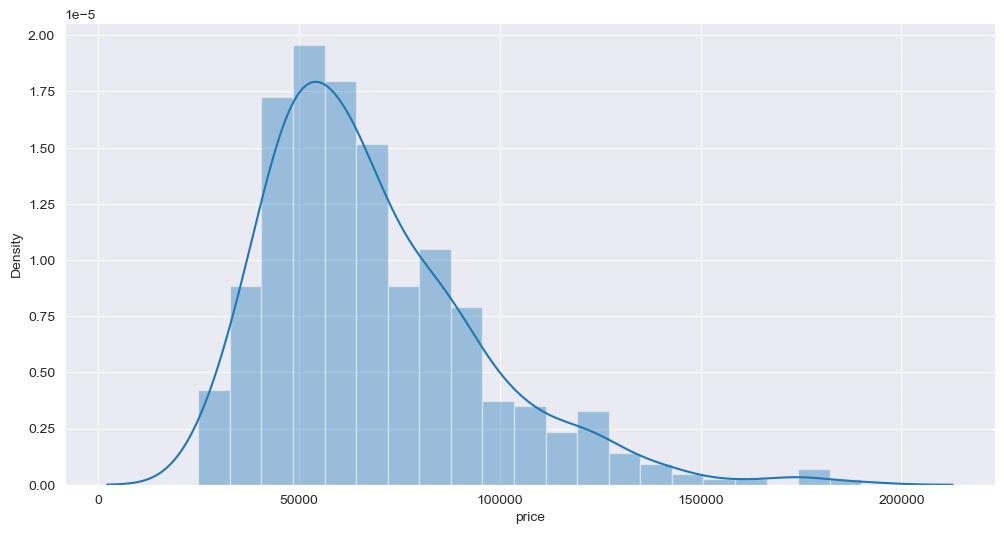

In [49]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

<AxesSubplot:ylabel='price'>

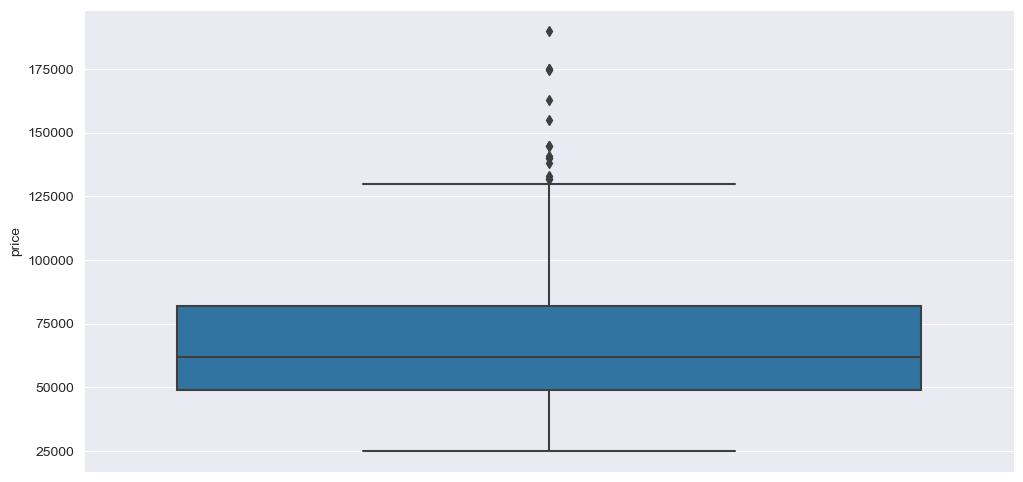

In [50]:
sns.boxplot(y="price", data=house)

In [70]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [68]:
house_price=house[house['price']<127000]

In [67]:
house_area=house[house['area']<10000]

In [69]:
house_room=house[house['rooms']<5]

In [86]:
house_final=(house[house['price']<127000] and house[house['area']<10000])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().